# Understanding Adolescent Fertility in Africa: A Data-Driven Perspective

Adolescent fertility remains a pressing concern across Africa, contributing to health risks, interrupted education, and long-term socio-economic challenges. This project explores the regional distribution and drivers of fertility rates among young females across African nations to help guide data-informed policymaking.


### Project Overview

This notebook is a data exploration project focused on understanding the factors influencing fertility rates among young women (ages 15–19) across Africa.

Reducing early childbearing is critical to improving maternal health, increasing educational attainment, and breaking cycles of poverty. This project uses publicly available data to explore the relationship between young women's fertility rates and factors like education, poverty, human development, and child labor.

### Goals of This Notebook

- To gather, inspect, and prepare relevant datasets for analysis
- To assess data quality and resolve inconsistent or missing values
- To conduct initial exploratory analysis and uncover broad patterns and correlations
- To provide helpful insight for policy making to reduce Young women's Fertility Rates Across Africa

### Key Indicators Explored

| **Variable** | **Description** |
|------------|---------|
| Adolescent Fertility Rate | Births per 1,000 women ages 15–19 (World Bank, 2023) |
| Female Youth Literacy Rate | % of young women (15–24) who can read and write (UNESCO, 2022) |
| Child Labor (Female, 5–17) | % of girls (5–17) engaged in child labor (UNICEF, 2023) |
| Urbanization Rate | % of population living in urban areas (World Bank, 2023) |
| Human Development Index (HDI) | Composite index measuring health, education, and standard of living (UNDP, 2022) |
 

### Notebook Structure

- **Data Gathering:** Loading and merging datasets from multiple sources
- **Data Cleaning and Wrangling:** Handling missing data, dropping irrelevant columns, and standardizing country codes
- **Exploratory Data Analysis (EDA):** Generating summary statistics and visualization to uncover patterns
- **Summary of Findings & Policy Recommendations:** Highlight key findings and outline future directions for policy-oriented analysis
- **Data Limitations:** This explains the limitations of the data exploration project


In [200]:
pip install xlrd


Note: you may need to restart the kernel to use updated packages.


In [2299]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import time
import plotly.express as px

## Data Gathering: Young Women’s Fertility Rate in Africa (Most Recent Available)

In this phase, I retrieve data on **Young Women’s Fertility Rate** — defined as the number of births per 1,000 women ages 15–19 — across all African countries.

The indicator code for this metric is **SP.ADO.TFRT**.

### Objectives:

- **Extract the most recent available data** for each African country (2022 or 2023, depending on data availability).
- **Leverage the World Bank's official API or downloaded CSV files** to retrieve reliable and up-to-date information directly from the source.
- **Save the data in a structured format (CSV)** for subsequent cleaning, analysis, and visualization.

This data will serve as a key variable in exploring the factors that influence young women’s fertility rates across Africa.


### Pulling Adolescent Fertility Rate Data Across African Countries (2013–2023)


In this section, I use the World Bank API to extract adolescent fertility rate data (births per 1,000 women ages 15–19) for all African countries over the past 10 years. I will then save the results as a CSV file for further analysis.

In [1188]:

# Step 1: Get list of African country codes from the World Bank
region_url = "https://api.worldbank.org/v2/region/AFR/country?format=json&per_page=100"
response = requests.get(region_url).json()
african_countries = [country['id'] for country in response[1]]

# Step 2: Define indicator and year range
indicator = "SP.ADO.TFRT"  # Adolescent fertility rate
start_year = 2013
end_year = 2023

# Step 3: Pull data for each country
all_data = []

for country in african_countries:
    url = f"https://api.worldbank.org/v2/country/{country}/indicator/{indicator}?format=json&per_page=1000"
    response = requests.get(url).json()
    
    if len(response) > 1:
        for entry in response[1]:
            year = int(entry['date'])
            if start_year <= year <= end_year and entry['value'] is not None:
                all_data.append({
                    "country": entry["country"]["value"],
                    "code": entry["country"]["id"],
                    "year": year,
                    "fertility_rate": entry["value"]
                })
    
    time.sleep(0.5)  # avoid rate limiting

# Step 4: Convert to DataFrame and save
fertility_df= pd.DataFrame(all_data)
fertility_df.to_csv("africa_fertility_2013_2023.csv", index=False)





In [1816]:
#listing all African Countries Available in the datasets
fertility_df[['code', 'country']].drop_duplicates().to_records(index=False).tolist()


[('DZ', 'Algeria'),
 ('AO', 'Angola'),
 ('BJ', 'Benin'),
 ('BW', 'Botswana'),
 ('BF', 'Burkina Faso'),
 ('BI', 'Burundi'),
 ('CV', 'Cabo Verde'),
 ('CM', 'Cameroon'),
 ('CF', 'Central African Republic'),
 ('TD', 'Chad'),
 ('KM', 'Comoros'),
 ('CD', 'Congo, Dem. Rep.'),
 ('CG', 'Congo, Rep.'),
 ('CI', "Cote d'Ivoire"),
 ('DJ', 'Djibouti'),
 ('EG', 'Egypt, Arab Rep.'),
 ('GQ', 'Equatorial Guinea'),
 ('ER', 'Eritrea'),
 ('SZ', 'Eswatini'),
 ('ET', 'Ethiopia'),
 ('GA', 'Gabon'),
 ('GM', 'Gambia, The'),
 ('GH', 'Ghana'),
 ('GN', 'Guinea'),
 ('GW', 'Guinea-Bissau'),
 ('KE', 'Kenya'),
 ('LS', 'Lesotho'),
 ('LR', 'Liberia'),
 ('LY', 'Libya'),
 ('MG', 'Madagascar'),
 ('MW', 'Malawi'),
 ('ML', 'Mali'),
 ('MR', 'Mauritania'),
 ('MU', 'Mauritius'),
 ('MA', 'Morocco'),
 ('MZ', 'Mozambique'),
 ('NA', 'Namibia'),
 ('NE', 'Niger'),
 ('NG', 'Nigeria'),
 ('RW', 'Rwanda'),
 ('ST', 'Sao Tome and Principe'),
 ('SN', 'Senegal'),
 ('SC', 'Seychelles'),
 ('SL', 'Sierra Leone'),
 ('SO', 'Somalia'),
 ('ZA', 'So

## Literacy Rate, Youth Female (% of Females Ages 15–24)

This dataset shows the **percentage of young women (ages 15–24) who are literate** in each country.

**Source:**  
UNESCO Institute for Statistics (UIS).  

**Year:**  
The data used in this analysis is from **2023**.  

**Note:**  
Although the main dataset (Adolescent Fertility Rate in Africa) is from 2023, the **2022 literacy rate data** was chosen for this analysis because it covers a **larger number of countries**, allowing for a more comprehensive and robust comparative study across Africa.



In [1818]:
# Loading Literacy data
literacy_df = pd.read_excel('API_SE.ADT.1524.LT.FE.ZS_DS2_en_excel_v2_3663.xls', sheet_name = 0, skiprows= 2)


# Pulling Urbanization Rate Data Across African Countries (2013–2023)

In this section, I extract data on the **percentage of the population living in urban areas** from the **World Bank API**.  
This indicator (`SP.URB.TOTL.IN.ZS`) gives insight into the level of urbanization, which often correlates with access to education, health services, and lower fertility rates.

- **Year of Interest:** 2023
- **Note:** The 2023 data was selected to align with the main dataset (Adolescent Fertility Rate) and to reflect the most recent available information across Africa.


In [83]:
# Step 1: Get list of African country codes from the World Bank (skip if already done)
region_url = "https://api.worldbank.org/v2/region/AFR/country?format=json&per_page=100"
response = requests.get(region_url).json()
african_countries = [country['id'] for country in response[1]]

# Step 2: Define indicator and year range
indicator = "SP.URB.TOTL.IN.ZS"  # Urban population (% of total)
start_year = 2013
end_year = 2023

# Step 3: Pull data for each country
all_data = []

for country in african_countries:
    url = f"https://api.worldbank.org/v2/country/{country}/indicator/{indicator}?format=json&per_page=1000"
    response = requests.get(url).json()

    if len(response) > 1 and response[1] is not None:
        for entry in response[1]:
            year = int(entry['date'])
            if start_year <= year <= end_year and entry['value'] is not None:
                all_data.append({
                    "country": entry["country"]["value"],
                    "code": entry["country"]["id"],
                    "year": year,
                    "urban_population_percent": entry["value"]
                })

    time.sleep(0.5)  # prevent rate limiting

# Step 4: Convert to DataFrame and save
urban_df = pd.DataFrame(all_data)
urban_df.to_csv("africa_urbanization_rate_2013_2023.csv", index=False)

## Gathering UNICEF Data (Child Labor - Female, 5–17)

To further explore factors affecting young women in Africa, I am retrieving data on the percentage of children (female, ages 5–17) involved in child labor.

This data, sourced from UNICEF, provides insight into the prevalence of child labor among girls — a key indicator of education, health, and economic conditions that may influence future outcomes such as young female fertility rates.

I downloaded this dataset directly from UNICEF's website in the form of an Excel file. The file contains country-specific estimates for the percentage of girls (5–17) engaged in child labor.

**Year of Interest:** 2023

**Note:**  
Source: [UNICEF – Child Labour Database](https://data.unicef.org/)  
  

In [1043]:

# Loading the file into a DataFrame
child_labour_df = pd.read_excel('XLS_Child-labour-database_Jun-2025 (1).xlsx', skiprows=11)
# View the first few rows to identify column names

child_labour_df .head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,1
0,Afghanistan,13.3,NaN,15.6,NaN,10.9,NaN,"MICS 2022-23, UNICEF and ILO calculations",19.3,NaN,19.6,NaN,19,NaN,"MICS 2022-23, UNICEF and ILO calculations"
1,Albania,2.8,NaN,3.4,NaN,2.1,NaN,"CLS 2010, ILO Harmonized Microdata, https://il...",3.3,y,3.6,y,3,y,"CLS 2010, ILO Harmonized Microdata, https://il..."
2,Algeria,1.9,NaN,2.5,NaN,1.3,NaN,"MICS 2018-19, UNICEF and ILO calculations",2.5,NaN,2.9,NaN,2,NaN,"MICS 2018-19, UNICEF and ILO calculations"
3,Andorra,-,NaN,-,NaN,-,NaN,NaN,-,NaN,-,NaN,-,NaN,NaN
4,Angola,9.7,NaN,8.9,NaN,10.4,NaN,"DHS 2015-16, UNICEF and ILO calculations",18.7,NaN,16.6,NaN,19.9,NaN,"DHS 2015-16, UNICEF and ILO calculations"


## Gathering Human Development Index (HDI) Data

To provide a broader view of human development in Africa, I am retrieving the **Human Development Index (HDI)**.  
The HDI is a composite index measuring average achievements in health (life expectancy), education (mean and expected years of schooling), and standard of living (GNI per capita).

This data, sourced from the [United Nations Development Programme (UNDP)](https://hdr.undp.org/) Human Development Report, offers a holistic view of a country's development, which may affect other indicators, such as young female fertility rates.

I downloaded this dataset directly from the **UNDP's Human Development Report website** in the form of an Excel file.  
The file contains country-specific HDI scores for **2022**.


In [1013]:
HDI = pd.read_excel('HDR25_Statistical_Annex_HDI_Table.xlsx', skiprows=5)
# View the first few rows to identify column names

HDI.head(5)

,HDI rank,Country,Value,Unnamed: 3,(years),Unnamed: 5,(years).1,Unnamed: 7,(years).2,Unnamed: 9,(2021 PPP $),Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,NaN,NaN,2023,NaN,2023.000,NaN,2023.00000,a,2023,a,2023,NaN,2023,b,2022
1,NaN,Very high human development,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,Iceland,0.972,NaN,82.691,NaN,18.85059,c,13.908926,d,69116.93736,NaN,12,NaN,3
3,2.0,Norway,0.97,NaN,83.308,NaN,18.79285,c,13.117962,e,112710.0211,f,0,NaN,1
4,2.0,Switzerland,0.97,NaN,83.954,NaN,16.66753,NaN,13.949121,e,81948.90177,f,5,NaN,2


## Data Cleaning Phase and Wrangling

At this stage, I will **prepare the raw data for analysis** by addressing issues that may affect its integrity and reliability.  

This process typically involves:

- **Checking for and handling missing values**
- **Removing duplicates**
- **Renaming columns for clarity**
- **Converting data types where necessary**
- **Filtering or dropping irrelevant columns or rows**
- **Ensuring consistency in the data** (such as proper formats and codes)

The main objective is to transform the raw data into a **clean, consistent, and reliable form** that I can use for further exploration and analysis.

---

Once the data is cleaned, I can move forward to the **next phases**, whether that's merging, exploration, or visualization.


## Cleaning up fertility_df

### Sort and Prepare Fertility Data

In this , I:
- Sort the DataFrame by **country and year** to organize it.
- Convert **'year'** to integer and **'fertility_rate'** to float to be sure I have the proper data types.
- We **leave missing values as-is** at this point, in case I need them later.

This prepares the data for further transformation and analysis.


In [1211]:
# Sort by country and year first
fertility_df = fertility_df.sort_values(['country','code', 'year'])

# Convert 'year' to int and 'fertility_rate' to float just to be sure
fertility_df['year'] = fertility_df['year'].astype(int)
fertility_df['fertility_rate'] = fertility_df['fertility_rate'].astype(float)


### Filter for 2023

Here I:
- Filter the data to retain **only the rows where `year == 2023`**.
- Reset the index afterwards for a clean, 0-indexed DataFrame.

This lets me to focus my analysis on the most recent data available.


In [1214]:
# Filter for 2023 and reset index
fertility_2023 = fertility_df[fertility_df['year'] == 2023].copy()
fertility_2023 = fertility_2023.reset_index(drop=True)

# renaming country and Country Name for consistency 
fertility_2023.rename(columns = {'country' : 'Country Name', 'code': 'Code'},inplace = True)

### Check for Duplicates

Here, I:
- Look for duplicated rows in the DataFrame.  
- Ideally, I want **each (country, year)** combination to be unique.

This lets me identify and handle redundancy in the data if it occurs.


In [1217]:
# Check for duplicates in the entire DataFrame
duplicate_rows = fertility_2023.duplicated()


### Final Check — Display Duplicated Rows (if any)

To be thorough, I:
- Display all duplicated rows I previously identified.
- If the output is **empty**, it means there were no duplicates.  
- Otherwise, I can investigate and resolve them if necessary.


In [1338]:
# Display duplicated rows
fertility_2023[duplicate_rows]

,Country Name,Code,year,fertility_rate


## Cleaning up of Literacy_df

### Initial Cleanup of `literacy_df`

In this , I:
- Set the first row of the DataFrame as the column titles.
- Remove this first row afterwards to avoid having it duplicated in the data.
- Reset the index to start from 0.  

This prepares my data for further transformation and an


In [1238]:
# Set first row as column titles
literacy_df.columns = literacy_df.iloc[0]

# Remove the first row from the DataFrame and reset the index
literacy_df = literacy_df.drop(index=0).reset_index(drop=True)


## Forward Filling to Get Latest Available Data

Some countries have missing values for **2023**, but I have data for previous years.  
To make sure I use the most recently available information for 2023, I forward fill across the row.  

This means I take the last non-`NaN` value I find in previous years and use it to fill in the missing 2023.



In [1240]:

# Forward fill across columns (years) to populate 2023 with the most recently available data
# If 2023 is NaN, it will take the last non-NaN from previous years in the row
literacy_df = literacy_df.ffill(axis=1)


### Filter for Africa

In this , I:
- Filter the DataFrame to **keep only the countries that are in Africa**.
- We do this by checking whether each country's code is in a predefined list of **African country codes**.
- After filtering, I reset the index to start from 0 again.  

This lets me focus my analysis solely on Africa, ignoring all other regions.


In [1248]:

african_countries = [
    'Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
    'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad',
    'Comoros', "Cote d'Ivoire", 'Congo, Dem. Rep.', 'Congo, Rep.',
    'Djibouti', 'Egypt, Arab Rep.', 'Equatorial Guinea', 'Eritrea',
    'Eswatini', 'Ethiopia', 'Gabon', 'Gambia, The', 'Ghana', 'Guinea',
    'Guinea-Bissau', 'Ivory Coast', 'Kenya', 'Lesotho', 'Liberia',
    'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius',
    'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda',
    'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone',
    'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania',
    'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'
]

# Filter the DataFrame for Africa
african_literacy_df = literacy_df[literacy_df['Country Name'].isin(african_countries)]

# Reset the index after filtering
african_literacy_df = african_literacy_df.reset_index(drop=True)


### Select and Transform Columns

In this , I:
- Select **only the relevant columns** I need for analysis.  
  Here, I keep:
  - Country Name
  - Country Code
  - The 2023.0 column, which contains literacy rate
- Rename `2023.0` to **`Literacy Rate`** for clarity.
- Add a new column called **Year** with a constant value of 2022, to provide context about when this data was measured.

This makes my DataFrame more compact, clear, and tailored to the analysis I want to perform.


In [1266]:
# Select relevant columns
african_literacy_2023 = african_literacy_df[['Country Name', 2023.0]]

# Rename 2022.0 to 'Literacy Rate'
african_literacy_2023 = african_literacy_2023.rename(columns={2023.0:'Literacy Rate'})



# Why We Created Country Codes in `african_literacy_2023`

I mapped country names to ISO-2 codes to:

- Provide a standardized identifier for each country.  
- Make it easier to merge with other datasets.  
- Reduce confusion from different naming conventions.



In [1271]:
africa_country_codes = {
    'Angola': 'AO',
    'Burundi': 'BI',
    'Benin': 'BJ',
    'Burkina Faso': 'BF',
    'Botswana': 'BW',
    'Central African Republic': 'CF',
    "Cote d'Ivoire": 'CI',
    'Cameroon': 'CM',
    'Congo, Dem. Rep.': 'CD',
    'Congo, Rep.': 'CG',
    'Comoros': 'KM',
    'Cabo Verde': 'CV',
    'Djibouti': 'DJ',
    'Algeria': 'DZ',
    'Egypt, Arab Rep.': 'EG',
    'Eritrea': 'ER',
    'Ethiopia': 'ET',
    'Gabon': 'GA',
    'Ghana': 'GH',
    'Guinea': 'GN',
    'Gambia, The': 'GM',
    'Guinea-Bissau': 'GW',
    'Equatorial Guinea': 'GQ',
    'Kenya': 'KE',
    'Liberia': 'LR',
    'Libya': 'LY',
    'Lesotho': 'LS',
    'Morocco': 'MA',
    'Madagascar': 'MG',
    'Mali': 'ML',
    'Mozambique': 'MZ',
    'Mauritania': 'MR',
    'Mauritius': 'MU',
    'Malawi': 'MW',
    'Namibia': 'NA',
    'Niger': 'NE',
    'Nigeria': 'NG',
    'Rwanda': 'RW',
    'Sudan': 'SD',
    'Senegal': 'SN',
    'Sierra Leone': 'SL',
    'Somalia': 'SO',
    'South Sudan': 'SS',
    'Sao Tome and Principe': 'ST',
    'Eswatini': 'SZ',
    'Seychelles': 'SC',
    'Chad': 'TD',
    'Togo': 'TG',
    'Tunisia': 'TN',
    'Tanzania': 'TZ',
    'Uganda': 'UG',
    'South Africa': 'ZA',
    'Zambia': 'ZM',
    'Zimbabwe': 'ZW'
}
# Assuming your DataFrame is called df and has a column 'Country Name'
african_literacy_2023['Code'] = african_literacy_2023['Country Name'].map(africa_country_codes)


### Final Check

In this , I:
- Display the first few rows of the cleaned and processed DataFrame.
- Validate whether:
  - The column names are appropriate.
  - The index starts from 0.
  - The "Year" column has been successfully added.
  - The "Literacy Rate" values align with the 2023 data.

This lets me do a quick sanity check to be sure everything is in order before proceeding with further analysis.


In [1834]:
# View first few rows to validate
african_literacy_2023.head(10)


,Country Name,Literacy Rate,Code
0,Angola,80.699997,AO
1,Burundi,93.160004,BI
2,Benin,59.099998,BJ
3,Burkina Faso,51.68,BF
4,Botswana,99.139542,BW
5,Central African Republic,29.110001,CF
6,Cote d'Ivoire,58.318272,CI
7,Cameroon,83.830002,CM
8,"Congo, Dem. Rep.",85.410004,CD
9,"Congo, Rep.",79.5,CG


## Cleaning urbanization data

### Sort and Prepare Urban Population Data

In this , I:
- Sort the DataFrame by **country and year** to organize it.
- Convert **'year'** to integer and **'urban_population'** to float to be sure I have proper data types.
- We **leave missing values as-is** at this point, in case I need them later.

This prepares the data for further transformation and analysis.


In [1315]:
# Sort by country and year first
urban_df = urban_df.sort_values(['country', 'year','code'])

# Convert 'year' to int and 'urban_population_percent' to float just to be sure
urban_df['year'] = urban_df['year'].astype(int)
urban_df['urban_population_percent'] = urban_df['urban_population_percent'].astype(float)


### Filter for 2023

Here I:
- Filter the data to retain **only the rows where `year == 2023`**.
- Reset the index afterwards for a clean, 0-indexed DataFrame.

This lets me focus my analysis on the most recent data available.


In [1340]:
# Filter for 2023 and reset index
urban_2023 = urban_df[urban_df['year'] == 2023].copy()
urban_2023 = urban_2023.reset_index(drop=True)
# renaming country ad Country Name for consistency

urban_2023.rename(columns = {'country': 'Country Name', 'code': 'Code'}, inplace = True)

### Check for Duplicates

Here, I:
- Look for duplicated rows in the DataFrame.  
- Ideally, I want **each (country, year)** combination to be unique.

This lets me identify and handle redundancy in the data if it occurs.


In [1342]:
# Check for duplicates in the entire DataFrame
duplicate_urban=urban_2023 .duplicated()


### Final Check — Display Duplicated Rows (if any)

To be thorough, I:
- Display all duplicated rows I previously identified.
- If the output is **empty**, it means there were no duplicates.  
- Otherwise, I can investigate and resolve them if necessary.


In [1345]:
# Display duplicated rows
urban_2023[duplicate_urban]


,Country Name,Code,year,urban_population_percent


## Cleaning Child_labour_df

### Select and Prepare Child Labour Data (2023)

To start:
- I first **select only the columns I need**, which are `Country Name` and `Child Labour Rate`.
- I then **give them more clear, descriptive names**.



In [1691]:
# Select Country Name and Child Labour Rate
child_labour_df_2023 = child_labour_df[['Unnamed: 0', 'Unnamed: 12']]

# Rename the columns for clarity
child_labour_df_2023 = child_labour_df_2023.rename(columns={'Unnamed: 0': 'Country Name', 'Unnamed: 12': 'Child Labour Rate'})


### Add a Year Column

To provide context to the data, I **add a new column called `Year`**, and I set it to `2023` for all rows.



In [1694]:
# Add a new column for Year
child_labour_df_2023['Year'] = 2023


### Filter for Africa

To narrow my analysis, I filter for **African countries only**.  
I first create a **list of Africa's countries**, then I use `.isin()` to retain only those rows.



In [1696]:
# Define a list of Africa's countries
african_countries = [
    "Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi",
    "Cabo Verde", "Cameroon", "Central African Republic", "Chad",
    "Comoros", "Congo", "Côte d'Ivoire", "Democratic Republic of the Congo",
    "Djibouti", "Egypt", "Equatorial Guinea", "Eritrea", "Eswatini",
    "Ethiopia", "Gabon", "Gambia", "Ghana", "Guinea", "Guinea-Bissau",
    "Kenya", "Lesotho", "Liberia", "Libya", "Madagascar", "Malawi",
    "Mali", "Mauritania", "Mauritius", "Morocco", "Mozambique",
    "Namibia", "Niger", "Nigeria", "Rwanda", "Sao Tome and Principe",
    "Senegal", "Seychelles", "Sierra Leone", "Somalia", "South Africa",
    "South Sudan", "Sudan", "Tanzania", "Togo", "Tunisia",
    "Uganda", "Zambia", "Zimbabwe","United Republic of Tanzania"
]



# Filter for Africa
child_labour_df_2023 = child_labour_df_2023[child_labour_df_2023['Country Name'].isin(african_countries)]

# Reset index after filtering
child_labour_df_2023 = child_labour_df_2023.reset_index(drop=True)


## Why We Are Matching Child Labour 2023 Data with Country Codes

To efficiently combine **Child Labour 2023** data with other datasets, I need a **common identifier**.  
Using ISO 2-letter country codes guarantees:

- **Consistency:** Each country has a unique code, avoiding confusion from different naming conventions.
- **Accuracy:** It prevents mismatched or duplicated entries when merging data.
- **Scalability:** Allows for easier and faster analysis across large and diverse datasets.

This  is essential for reliable, unified, and insightful cross-country analysis.



In [1699]:
african_country_codes = {
    "Algeria": "DZ",
    "Angola": "AO",
    "Benin": "BJ",
    "Botswana": "BW",
    "Burkina Faso": "BF",
    "Burundi": "BI",
    "Cabo Verde": "CV",
    "Cameroon": "CM",
    "Central African Republic": "CF",
    "Chad": "TD",
    "Comoros": "KM",
    "Congo": "CG",
    "Côte d'Ivoire": "CI",
    "Democratic Republic of the Congo": "CD",
    "Djibouti": "DJ",
    "Egypt": "EG",
    "Equatorial Guinea": "GQ",
    "Eritrea": "ER",
    "Eswatini": "SZ",
    "Ethiopia": "ET",
    "Gabon": "GA",
    "Gambia": "GM",
    "Ghana": "GH",
    "Guinea": "GN",
    "Guinea-Bissau": "GW",
    "Kenya": "KE",
    "Lesotho": "LS",
    "Liberia": "LR",
    "Libya": "LY",
    "Madagascar": "MG",
    "Malawi": "MW",
    "Mali": "ML",
    "Mauritania": "MR",
    "Mauritius": "MU",
    "Morocco": "MA",
    "Mozambique": "MZ",
    "Namibia": "NA",
    "Niger": "NE",
    "Nigeria": "NG",
    "Rwanda": "RW",
    "Sao Tome and Principe": "ST",
    "Senegal": "SN",
    "Seychelles": "SC",
    "Sierra Leone": "SL",
    "Somalia": "SO",
    "South Africa": "ZA",
    "South Sudan": "SS",
    "Sudan": "SD",
    "United Republic of Tanzania": "TZ",
    "Togo": "TG",
    "Tunisia": "TN",
    "Uganda": "UG",
    "Zambia": "ZM",
    "Zimbabwe": "ZW"
}

# Assuming your DataFrame is called df and has a column 'Country Name'
child_labour_df_2023['Code'] =  child_labour_df_2023['Country Name'].map(africa_country_codes)


In [1701]:
#adding county codes to countries with no code
child_labour_df_2023.loc[11, 'Code'] = "CG"
child_labour_df_2023.loc[12, 'Code'] = "CD"
child_labour_df_2023.loc[13, 'Code'] = "CI"
child_labour_df_2023.loc[15, 'Code'] = "EG"
child_labour_df_2023.loc[21, 'Code'] = "GM"
child_labour_df_2023.loc[51, 'Code'] = "TZ"


### final Check

Let's view the first few rows to **verify I've kept only Africa's countries with clear column naming and a Year column**.



In [1822]:
# Final preview
child_labour_df_2023.head(10)


,Country Name,Child Labour Rate,Year,Code
0,Algeria,2,2023,DZ
1,Angola,19.9,2023,AO
2,Benin,19.4,2023,BJ
3,Botswana,-,2023,BW
4,Burkina Faso,24.2,2023,BF
5,Burundi,58.9,2023,BI
6,Cabo Verde,-,2023,CV
7,Cameroon,37.7,2023,CM
8,Central African Republic,29,2023,CF
9,Chad,39.6,2023,TD


### Cleaning HDI data

### Select and Prepare HDI Data (2022)

To start:
- We select only the columns I need, which are `Country` and `HDI rank`.
- We then filter this to retain only Africa's countries.



In [2204]:
# Select Country and HDI rank
HDI_2022 = HDI[['HDI rank', 'Country']]


### Define List of Africa's Countries

I create a list of Africa's countries.  
This lets me filter for only those in Africa.



In [2207]:
# Define a list of Africa's countries
african_countries = [
    "Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi",
    "Cabo Verde", "Cameroon", "Central African Republic", "Chad",
    "Comoros", "Congo (Democratic Republic of the)", "Congo", "Côte d'Ivoire",
    "Djibouti", "Egypt", "Equatorial Guinea", "Eritrea", "Eswatini (Kingdom of)",
    "Ethiopia", "Gabon", "Gambia, The", "Ghana", "Guinea", "Gambia",
    "Guinea-Bissau", "Kenya", "Lesotho", "Liberia", "Libya",
    "Madagascar", "Malawi", "Mali", "Mauritania", "Mauritius",
    "Morocco", "Mozambique", "Namibia", "Niger", "Nigeria",
    "Rwanda", "Sao Tome and Principe", "Senegal", "Seychelles",
    "Sierra Leone", "Somalia", "South Africa", "South Sudan",
    "Sudan", "Tanzania", "Togo", "Tunisia", "Uganda",
    "Zambia", "Zimbabwe","Tanzania (United Republic of)"
]




### Filter for Africa

Using `.isin()` I filter the DataFrame to retain only Africa's countries.  
Then I reset the index for clarity.



In [2210]:
# Filter for Africa
HDI_2022 = HDI_2022[HDI_2022['Country'].isin(african_countries)]

# Reset index after filtering
HDI_2022 = HDI_2022.reset_index(drop=True)

# rename the country as Country name for merging

HDI_2022.rename(columns = {'Country' : 'Country Name'},inplace = True)


# Why We Are Matching Country Names with Country Codes in `HDI_2022`

When working with international datasets like the **Human Development Index (HDI) 2022**, it's crucial to match country names with their **standard country codes (such as ISO 3166-1-alpha-2)**. Here’s why:

- **Consistency:** Country names may appear in different formats across datasets (e.g., "United States" vs. "United States of America"). Country codes provide a unified way to identify each country.

- **Merges and Joins:** Merging or joining datasets by country codes is more reliable and less prone to error, especially when country names are not standardized.

- **Cleaner Analysis:** Using codes makes it easier to perform operations like grouping, aggregating, or visualizing data across different sources.

- **Scalable:** Country codes allow for faster and more efficient computing when dealing with large and frequently-updated datasets.

In this context, I mapped the country names in `HDI_2022` to their ISO 2-letter codes to streamline my analysis and make sure I match accurately across different data sources.


In [2213]:
african_country_codes = {
    "Algeria": "DZ",
    "Angola": "AO",
    "Benin": "BJ",
    "Botswana": "BW",
    "Burkina Faso": "BF",
    "Burundi": "BI",
    "Cabo Verde": "CV",
    "Cameroon": "CM",
    "Central African Republic": "CF",
    "Chad": "TD",
    "Comoros": "KM",
    "Congo (Democratic Republic of the)": "CD",
    "Congo": "CG",
    "Côte d'Ivoire": "CI",
    "Djibouti": "DJ",
    "Egypt": "EG",
    "Equatorial Guinea": "GQ",
    "Eritrea": "ER",
    "Eswatini (Kingdom of)": "SZ",
    "Ethiopia": "ET",
    "Gabon": "GA",
    "Gambia, The": "GM",
    "Ghana": "GH",
    "Guinea": "GN",
    "Guinea-Bissau": "GW",
    "Kenya": "KE",
    "Lesotho": "LS",
    "Liberia": "LR",
    "Libya": "LY",
    "Madagascar": "MG",
    "Malawi": "MW",
    "Mali": "ML",
    "Mauritania": "MR",
    "Mauritius": "MU",
    "Morocco": "MA",
    "Mozambique": "MZ",
    "Namibia": "NA",
    "Niger": "NE",
    "Nigeria": "NG",
    "Rwanda": "RW",
    "Sao Tome and Principe": "ST",
    "Senegal": "SN",
    "Seychelles": "SC",
    "Sierra Leone": "SL",
    "Somalia": "SO",
    "South Africa": "ZA",
    "South Sudan": "SS",
    "Sudan": "SD",
    "Tanzania (United Republic of)": "TZ",
    "Togo": "TG",
    "Tunisia": "TN",
    "Uganda": "UG",
    "Zambia": "ZM",
    "Zimbabwe": "ZW"
}
HDI_2022['Code'] =  HDI_2022['Country Name'].map(africa_country_codes)


In [2215]:
#adding Country Code with Countries without Code
HDI_2022.loc[3,"Code"] = "EG"
HDI_2022.loc[23,"Code"] = "CI"
HDI_2022.loc[10,"Code"] = "SZ"
HDI_2022.loc[32,"Code"] = "GM"
HDI_2022.loc[29,"Code"] = "TZ"
HDI_2022.loc[33,"Code"] = "CD"
HDI_2022.loc[14,"Code"] = "CG"

### Final Check

Let's view the first few rows to verify I've kept only Africa's countries with their HDI rank.



In [2218]:
HDI_2022.head(3)

,HDI rank,Country Name,Code
0,54.0,Seychelles,SC
1,73.0,Mauritius,MU
2,96.0,Algeria,DZ


## Merging All Datasets into a Unified DataFrame

To perform a **consolidated analysis**, I need to combine all the separate datasets — **child labor, urban population, human development index (HDI), and literacy rate** — into a single DataFrame.  
This lets me view all indicators side by side and perform more insightful comparisons across countries.

---

### Select Relevant Columns

We start by selecting only the necessary columns from each dataset:

- **Child Labour:** Country code and child labor rate
- **Urban:** Country code and percentage of population living in urban areas
- **HDI:** Country code and Human Development Index rank
- **Literacy:** Country code and literacy rate

---

### Perform Merges (Left Join)

Using `Code` as the key, I perform **left merges** to combine these datasets into a single DataFrame.  
We start from the **fertility dataset** and then progressively add in child labor, urban population, HDI, and literacy.  
A left merge guarantees I retain all rows from the base (fertility) while adding matching information from the other datasets.

---

### Final Outcome:

The resulting `merged_df` will have:

- Fertility rate
- Child labor rate
- Urban population %
- Human Development Index (HDI) rank
- Literacy rate

This unified view lets me easily perform comparative analysis and visualize relationships across these indicators.



In [2220]:
#  Select only the relevant columns from each DataFrame
child_labour = child_labour_df_2023[['Code', 'Child Labour Rate']]  # Country code and child labor rate
urban = urban_2023[['Code', 'urban_population_percent']]  # Country code and % of population in urban areas
hdi = HDI_2022[['Code', 'HDI rank']]  # Country code and Human Development Index rank
literacy = african_literacy_2023[['Code', 'Literacy Rate']]  # Country code and literacy rate


In [2222]:
#  Begin by copying the base DataFrame (fertility) to avoid modifying original
merged_df = fertility_2023.copy()

# Perform left merges to add additional datasets on country code
merged_df = merged_df.merge(child_labour, on='Code', how='left')  # Merges child labor data
merged_df = merged_df.merge(urban, on='Code', how='left')  # Merges urban population data
merged_df = merged_df.merge(hdi, on='Code', how='left')  # Merges human development index
merged_df = merged_df.merge(literacy, on='Code', how='left')  # Merges literacy rate

#  Final merged_df now contains:
# - Fertility rate
# - Child labor rate
# - Urban population %
# - Human Development Index (HDI) rank
# - Literacy rate

In [2297]:
merged_df

,Country Name,Code,year,fertility_rate,Child Labour Rate,urban_population_percent,HDI rank,Literacy Rate,HDI_Category_Official
0,Algeria,DZ,2023,8.698,2.0,75.268,96.0,97.989700,High Human Development
1,Angola,AO,2023,140.840,19.9,68.688,148.0,80.699997,Medium Human Development
2,Benin,BJ,2023,77.844,19.4,50.100,173.0,59.099998,Low Human Development
3,Botswana,BW,2023,53.805,NaN,72.867,111.0,99.139542,High Human Development
4,Burkina Faso,BF,2023,87.082,24.2,32.520,186.0,51.680000,Low Human Development
5,Burundi,BI,2023,53.364,58.9,14.784,187.0,93.160004,Low Human Development
6,Cabo Verde,CV,2023,38.755,NaN,67.982,135.0,99.250000,Medium Human Development
7,Cameroon,CM,2023,106.661,37.7,59.315,155.0,83.830002,Medium Human Development
8,Central African Republic,CF,2023,163.093,29.0,43.614,191.0,29.110001,Low Human Development
9,Chad,TD,2023,134.738,39.6,24.366,190.0,30.639999,Low Human Development


# Exploratory Data Analysis (EDA)

## Summary Statistics

In [1931]:
merged_df['fertility_rate'].describe()

count     54.000000
mean      82.426315
std       40.102959
min        4.315000
25%       55.503000
50%       84.088000
75%      112.376750
max      163.093000
Name: fertility_rate, dtype: float64

In [1933]:
from scipy.stats import skew

skewness = skew(merged_df['fertility_rate'])
print("Skewness :", skewness)


Skewness : -0.024886606758135272


___
## Key Insight: Summary Statistics for Further Investigation

The **exploratory summary statistics** of the teenage and young female fertility rate across Africa provide a strong basis for further investigation:

- The **mean** fertility rate is **about 82.5 births per 1,000 women aged 15–19**, reflecting a **remarkably high average prevalence** across the continent. This rate is significantly higher than the **global average of roughly 39 per 1,000 in 2023**, underscoring the urgency of addressing this issue.

- The **median**, at **about 84.1**, is slightly greater than the mean. This indicates a **slight left-skew** in the distribution (with a skewness of ≈ -0.025), suggesting that a large proportion of countries have fertility rates above the average, while a small number trail far below.

- The **interquartile range (IQR)** of nearly **57** (between the 25th percentile at 55.3 and the 75th percentile at 112.4) underscores **wide variation** in the distribution. Importantly, this highlights that high teenage and young female fertility is **not uniform across Africa**, and policy makers need to be vigilant across a broad spectrum of cases and regional contexts.

- The **minimum (4.32)** and **maximum (163.1)** values show **significant disparities**, ranging from very low to extremely high teenage and young female fertility. This vast range underscores the **widespread prevalence and persistent nature of the phenomenon across Africa**.

---

### Next steps:

**Univariate visualization:**  
To further explore the distribution's shape and central tendency, **box plots or violin plots** can be more effective in illustrating the spread and slight left-skew in the data.

**Bivariate analysis:**  
To uncover relationships with other factors at education levels, economic indicators, or policy regimes, scatter plots and correlations will be helpful.

**Multivariate analysis:**  
To control for multiple variables at once, regression or multivariate methods can provide deeper insights into the drivers of these teenage and young female fertility rates.

---

Ultimately, these summary statistics underscore the urgency for policy makers and stakeholders to pay close attention to this phenomenon across Africa. The **high average rate**, **wide variation**, and **persistence across the continent** all highlight the need for targeted policy responses and further research into the factors contributing to this pattern.


# Univariate Analysis: Distribution of Fertility Rates

- I begin with a boxplot and density plot to understand how adolescent fertility is distributed across countries. This helps detect skewness, outliers, and clustering.
- I also try to identufy countries with high femal Children fertility rate

## Box Plot for displaying five number summary

A box plot is excellent for visualizing the five-number summary (minimum, first quartile, median, third quartile, and maximum) and identifying outliers. It also provides a clear visual of the data's spread and skewness.


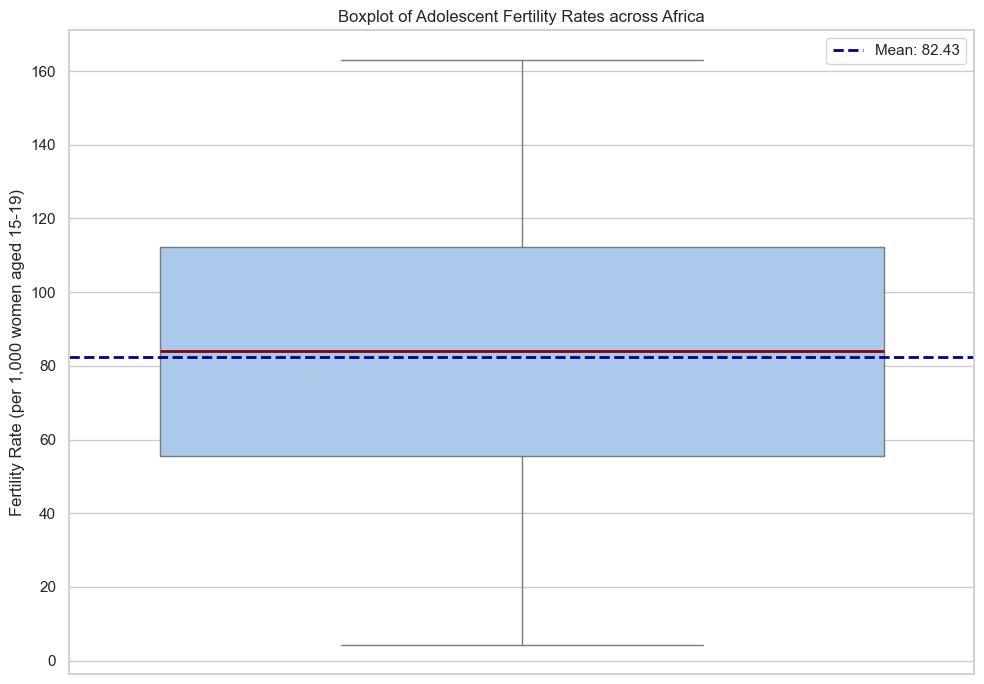

In [1938]:
# calculating the mean

mean_fertility = merged_df['fertility_rate'].mean()

plt.figure(figsize=(10, 7))

# Using a specific pastel color for the box
box_fill_color = sns.color_palette("pastel")[0] # This is typically a light blue


# Median line color - keeps your dark red
median_line_color = 'darkred'

# Mean line color - change to darkblue for better distinction/accessibility
mean_line_color = 'darkblue' 
sns.boxplot(y='fertility_rate', data=merged_df,
            color=box_fill_color,
            medianprops={'color': median_line_color, 'linewidth': 2})

# Adding the mean line
plt.axhline(mean_fertility, color=mean_line_color, linestyle='--', linewidth=2, label=f'Mean: {mean_fertility:.2f}')

plt.title("Boxplot of Adolescent Fertility Rates across Africa")
plt.ylabel("Fertility Rate (per 1,000 women aged 15-19)")
plt.legend()
plt.tight_layout()
plt.show()

___
## Key Insight: The box plot illustrates the "Distribution of Fertility Rate across Africa". It reinforces the insights from the summary statistics:

* The **median** (red dashed line) is clearly visible within the box, slightly above the center, indicating the left-skewness.
* The **interquartile range** (the box itself) shows the spread of the middle 50% of the data.
* The **whiskers** extend to cover the majority of the data points, showing the overall range.
* A **mean line** has been added for clarity, indicating the average fertility rate at approximately 82.43.
* The grid lines on the y-axis enhance readability, making it easier to estimate values.
___

## Identifying Top Countries by Fertility Rate

Beyond understanding the overall distribution, it's also valuable to identify specific countries at the higher end of the fertility rate spectrum. A horizontal bar chart is ideal for ranking and comparing these discrete entities.


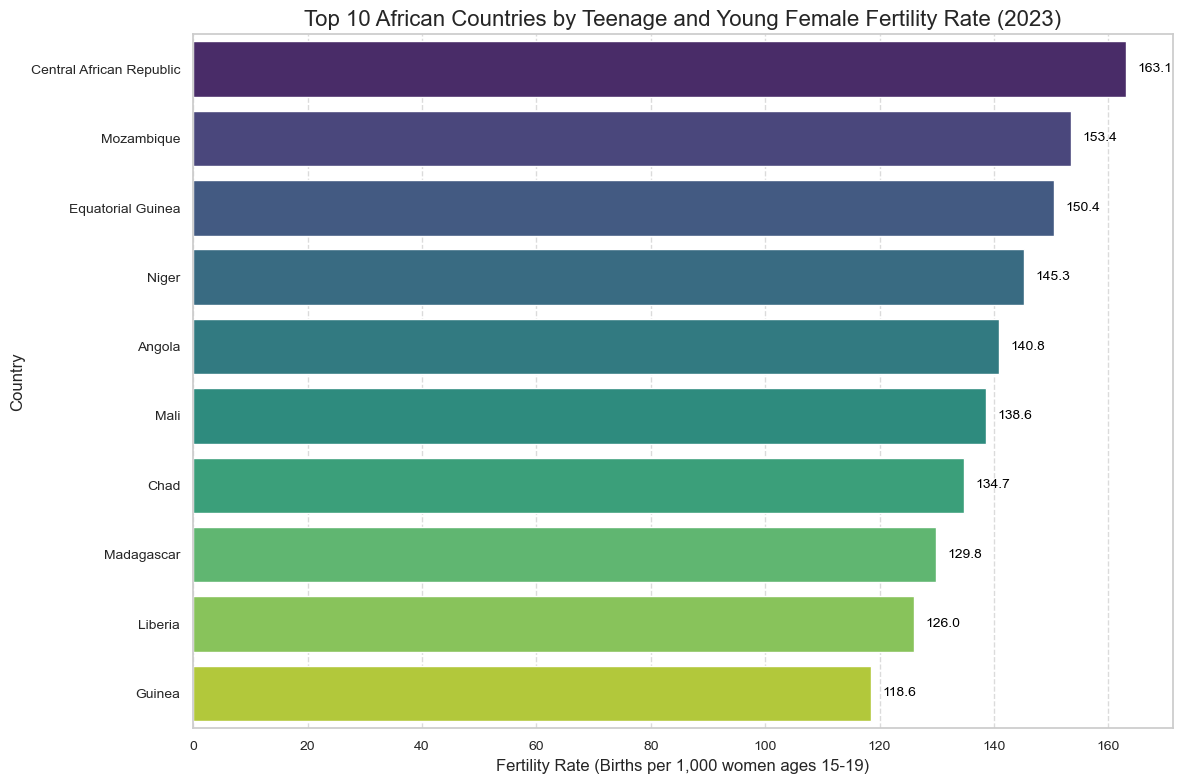

In [1942]:
# Sort the DataFrame by 'fertility_rate' in descending order
top_countries = merged_df.sort_values(by='fertility_rate', ascending=False)

# Select the top N countries (e.g., top 10)
n_top = 10
top_n_countries = top_countries.head(n_top)

#  Create the horizontal bar plot
plt.figure(figsize=(12, 8))

# We'll assign the barplot to an 'ax' variable to manipulate it
ax = sns.barplot(
    x='fertility_rate',
    y='Country Name',
    data=top_n_countries,
    hue='Country Name', # Explicitly assign 'hue' to address the FutureWarning
    palette='viridis',  # Your desired color palette
    legend=False        # Hide the legend as y-axis labels are sufficient
)

#  Add titles and labels
plt.title(f'Top {n_top} African Countries by Teenage and Young Female Fertility Rate (2023)', fontsize=16)
plt.xlabel('Fertility Rate (Births per 1,000 women ages 15-19)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# --- Simplified and Robust Way to Add Value Labels ---
# This loop is designed to get the value directly from the DataFrame and place it correctly

# Iterate through each row of the 'top_n_countries' DataFrame
# 'index' will be 0 for the first row, 1 for the second, etc.
# 'row' will be the entire row of data for that country
for index, row in enumerate(top_n_countries.itertuples()):
    # Get the fertility rate for the current country
    fertility_value = row.fertility_rate

    # Calculate the X-position for the text:
    # It's the fertility_value itself, plus a small gap (e.g., 2 units)
    # This places the text just to the right of the end of the bar.
    x_position = fertility_value + 2

    # Calculate the Y-position for the text:
    # The 'index' from 'enumerate' matches the vertical position of each bar.
    # We use this directly to put the text in line with its bar.
    y_position = index

    # Create the text string to display:
    # Use an f-string to format the 'fertility_value' to one decimal place.
    text_to_display = f'{fertility_value:.1f}'

    # Add the text to the plot:
    ax.text(
        x_position,         # The X-coordinate where the text starts
        y_position,         # The Y-coordinate where the text is vertically centered
        text_to_display,    # The actual number (text) to show
        color='black',      # Make the text black
        ha='left',          # Horizontal alignment: left edge of text at x_position
        va='center',        # Vertical alignment: center of text at y_position
        fontsize=10         # Make the text font size smaller for readability
    )


plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

___
## Key Insight: Top 10 Adolescent Fertility Rates in Africa (2023)

Adolescent fertility remains a critical issue in Africa. In 2023, the **Central African Republic** recorded the highest rate with **163.1 births per 1,000 girls aged 15–19**, followed by **Mozambique**, **Equatorial Guinea**, and **Niger**.

These high rates reflect deep challenges—**early marriage, lack of education, and poor access to reproductive health services**. 

Targeted efforts are urgently needed in these countries to support young girls through **education, health access, and economic empowerment**.

This data highlights where the **need for intervention is greatest**.
___

# Bivariate Analysis

## Fertility and Human Developmeent Index

- Now explore how fertility rate varies accross different countries and there level of developmentt

## Investigating Teenage Fertility Rate and Human Development Index

This analysis explores the relationship between teenage fertility rates and the Human Development Index (HDI) across African countries. High adolescent birth rates often reflect broader development challenges, including limited access to education, healthcare, and economic opportunities for young women. By comparing these two indicators, I aim to uncover patterns that


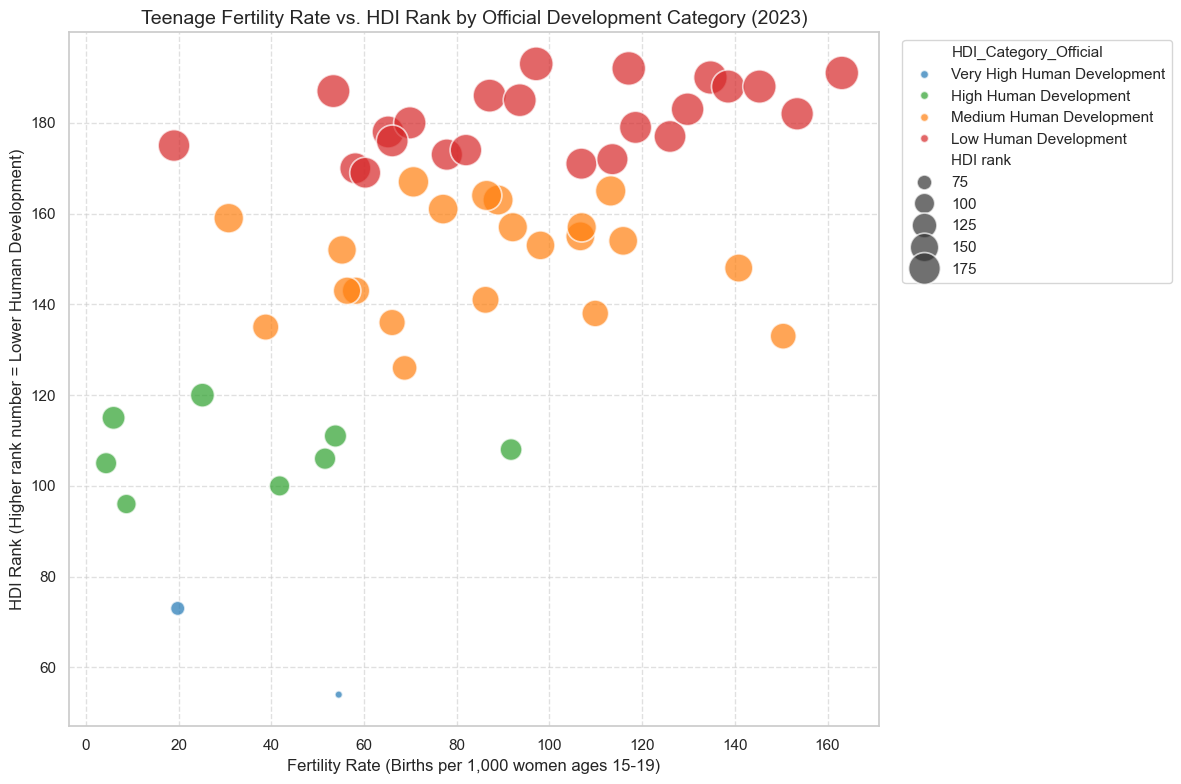

In [2240]:
#only using countries with available dataset
merged_df_clean = merged_df.dropna(subset=['HDI rank']).copy()


# Define the function for categorization using the official UNDP HDI rank tiers
def get_hdi_category_official(rank):
    if 1 <= rank <= 74:
        return 'Very High Human Development'
    elif 75 <= rank <= 124:
        return 'High Human Development'
    elif 125 <= rank <= 167:
        return 'Medium Human Development'
    elif 168 <= rank <= 193:
        return 'Low Human Development'
    else:
        return 'Uncategorized (Rank outside 1-193)' # Handle any ranks outside the defined range

# Apply the function to create the 'HDI_Category_Official' column
merged_df_clean['HDI_Category_Official'] = merged_df_clean['HDI rank'].apply(get_hdi_category_official)

# Define the desired order for the categories for consistent plotting and legend order
hdi_category_order_official = [
    'Very High Human Development',
    'High Human Development',
    'Medium Human Development',
    'Low Human Development'
]

# Ensure the new category column is ordered, this helps with consistent color mapping
merged_df_clean['HDI_Category_Official'] = pd.Categorical(
    merged_df_clean['HDI_Category_Official'],
    categories=hdi_category_order_official,
    ordered=True
)


custom_palette = {
    'Very High Human Development': '#1f77b4', # Dark Blue
    'High Human Development': '#2ca02c',      # Green
    'Medium Human Development': '#ff7f0e',    # Orange
    'Low Human Development': '#d62728'        # Red
}
#  Create the Scatter Plot with the new HDI_Category_Official ---
plt.figure(figsize=(12, 8)) # A wider figure helps accommodate the legend outside

sns.scatterplot(
    x='fertility_rate',
    y='HDI rank',
    data=merged_df_clean, # Use the cleaned and categorized DataFrame
    hue='HDI_Category_Official', # Use the new category for color-coding
    size='HDI rank',             # Still use HDI rank for point size to emphasize development level
    sizes=(30, 600),             # Adjust size range if needed
    alpha=0.7,                   # Transparency for overlapping points
    palette= custom_palette        # Use a sequential color palette (reversed for intuition: dark for high dev, light for low dev)
)

plt.title('Teenage Fertility Rate vs. HDI Rank by Official Development Category (2023)', fontsize=14)
plt.xlabel('Fertility Rate (Births per 1,000 women ages 15-19)', fontsize=12)
plt.ylabel('HDI Rank (Higher rank number = Lower Human Development)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Place the legend outside the plot area to prevent overlay
plt.legend( bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout() # Automatically adjusts plot params for a tight layout, good practice with external legends
plt.show()

_____
## Key Insight Teenage Fertility Rate and Human Development Index (HDI) Rank

This scatter plot illustrates the relationship between a country’s level of human development and its teenage fertility rate across African nations.

Countries with **higher human development** (represented by lower HDI ranks) tend to have **lower adolescent fertility rates**. These are typically shown in cooler colors like blue on the plot.

On the other hand, countries with **lower levels of human development** (higher HDI ranks) often exhibit **higher fertility rates**, and are represented with warmer colors like red or orange.

Overall, the plot demonstrates a **clear negative correlation** between HDI rank and adolescent fertility rate. As indicators of development such as health, education, and income improve, fertility rates among teenagers tend to decrease. This trend highlights the important role of human development in addressing teenage fertility across the continent.
___

# Multivariate Analysis

## Adolescent Fertility Rate and Other Development Indicators

- We explore how fertility rate is influenced by  different indicators across Human development categories

## Adolescent Fertility Rate and Other Development Indicators

This analysis examines how adolescent fertility rates relate to other key development indicators such as literacy rate, child labor, urban population, and HDI. Understanding these relation


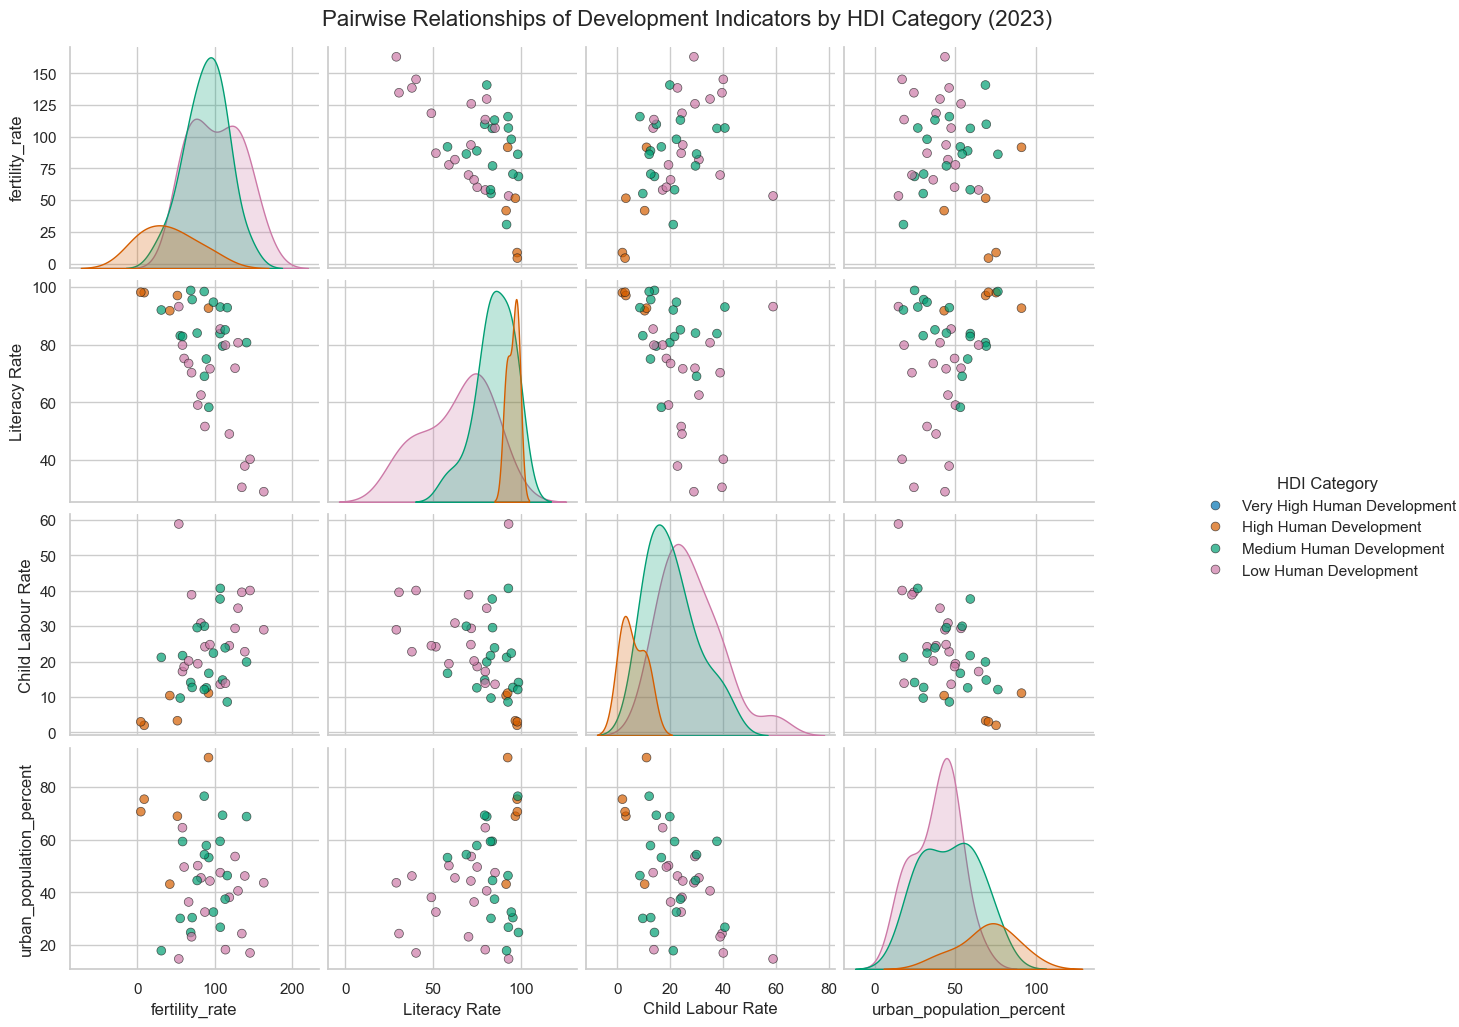

In [2242]:
# Define the columns to include in the pair plot (excluding 'HDI rank')

custom_palette = {
    'Very High Human Development': '#0072B2', # Dark Blue
    'High Human Development': '#D55E00',      # Green
    'Medium Human Development': '#009E73',    # Orange
    'Low Human Development': '#CC79A7'        # Red
}
cols_for_pairplot = [
    'fertility_rate',
    'Literacy Rate',
    'Child Labour Rate',
    'urban_population_percent'
]

# Create a clean copy of the relevant data
filtered_df = merged_df_clean[cols_for_pairplot + ['HDI_Category_Official']].copy()

#  Convert 'Child Labour Rate' to numeric, coercing invalid strings to NaN
filtered_df['Child Labour Rate'] = pd.to_numeric(filtered_df['Child Labour Rate'], errors='coerce')

# Step 3: Filter out rows with negative or missing values
filtered_df = filtered_df[filtered_df['Child Labour Rate'] >= 0].dropna()

#  Set visual style for the plot
sns.set(style="whitegrid", context="notebook")

#  Create the pair plot
pairplot = sns.pairplot(
    filtered_df,
    hue='HDI_Category_Official',
    palette=custom_palette,
    diag_kind='kde',
    height=2.8,
    plot_kws={'alpha': 0.7, 's': 40, 'edgecolor': 'k'},
    corner=False
)

# Resize the plot canvas to fit legend
pairplot.fig.set_size_inches(14, 10)

#  Add title
pairplot.fig.suptitle(
    'Pairwise Relationships of Development Indicators by HDI Category (2023)',
    fontsize=16,
    y=1.02
)

#  Move the legend outside
pairplot._legend.set_bbox_to_anchor((1.05, 0.5))
pairplot._legend.set_title("HDI Category")

#  Save and display
pairplot.savefig('dev_indicators_pairplot.png', bbox_inches='tight', dpi=300)
plt.show()

___
## Key Insight: Adolescent Fertility Rate & Development Indicators

This pair plot reveals crucial relationships for adolescent fertility in African countries, categorized by HDI:

- **Higher HDI (Lower Rank) → Lower Fertility**  
  Countries with higher human development consistently show lower adolescent fertility rates.

- **Literacy’s Impact**  
  As literacy rate increases, adolescent fertility rate generally decreases. Higher HDI categories exhibit both higher literacy and lower fertility.

- **Child Labour Link**  
  A higher child labour rate is associated with higher adolescent fertility rate. Countries with lower HDI often have higher rates of both.

- **Urbanization Effect**  
  Increasing urban population percentage tends to correlate with lower adolescent fertility rate. More developed nations are typically more urbanized.


Improvements across key development indicators such as **education**, **reduced child labour**, **urbanization**, and overall **HDI**,  are strongly linked to **lower adolescent fertility rates** across Africa.
____

## How Development Indicators Relate to Adolescent Fertility in Africa

This section explores the relationship between adolescent fertility and key development indicators. By analyzing correlations, I aim to uncover which socio-economic factors such as education, child labour, and human development—are most linked to high fertility rates, offering insight for evidence-based policy intervention.


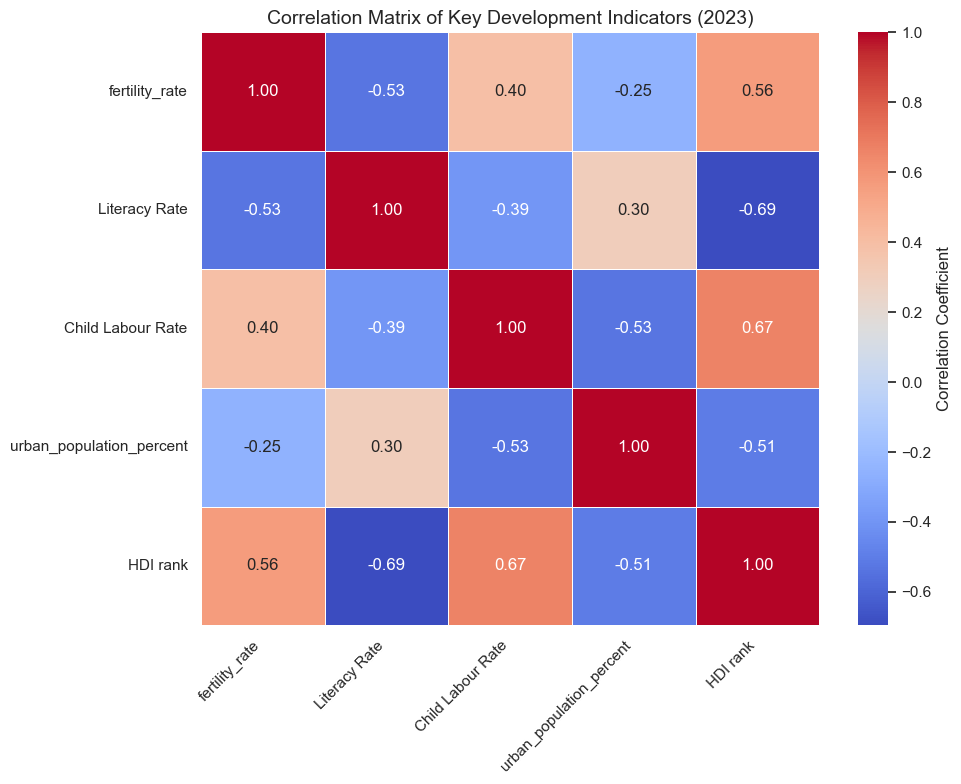

In [2244]:
# I'll include 'fertility_rate' as the main variable
numerical_cols = [
    'fertility_rate',
    'Literacy Rate',
    'Child Labour Rate',
    'urban_population_percent',
    'HDI rank'
]
#  Replace '-' with NaN
merged_df_clean[numerical_cols] = merged_df_clean[numerical_cols].replace('-', np.nan)
# Infer proper data types explicitly (this removes the FutureWarning)
merged_df_clean[numerical_cols] = merged_df_clean[numerical_cols].infer_objects(copy=False)

# Calculate the correlation matrix
correlation_matrix = merged_df_clean[numerical_cols].corr()

plt.figure(figsize=(10, 8)) # Adjust figure size for better readability of the heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,      # Show the correlation values on the heatmap
    cmap='coolwarm', # Color map: 'coolwarm' is good for showing positive/negative correlations
    fmt=".2f",       # Format annotations to 2 decimal places
    linewidths=.5,   # Add lines between cells for clarity
    cbar_kws={'label': 'Correlation Coefficient'} # Add a label to the color bar
)

plt.title('Correlation Matrix of Key Development Indicators (2023)', fontsize=14)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
plt.yticks(rotation=0)             # Keep y-axis labels horizontal
plt.tight_layout() # Adjust layout to prevent labels/title from being cut off
plt.show()


---
## Key Insight: Correlation Insights: Adolescent Fertility & Development (2023)

- **Literacy Rate (-0.53)**: Countries with higher literacy—especially among girls—tend to have **lower adolescent fertility rates**.

- **Child Labour (+0.40)**: Higher fertility often coincides with **more child labour**, possibly due to economic hardship and larger family sizes.

- **Urban Population (-0.25)**: Fertility rates are slightly lower in **more urbanized areas**, reflecting better access to education and healthcare.

- **HDI Rank (+0.56)**: A higher HDI rank (i.e., lower human development) is strongly associated with **higher fertility**, highlighting the **impact of underdevelopment**.

> These patterns show that improving **education, urban access, and overall development** can significantly reduce adolescent fertility across Africa.
---

# Summary of Findings & Policy Recommendations  
## Adolescent Fertility in Africa (2023)

### Key Insights
- **Human Development Matters**: Countries with higher HDI levels have significantly lower adolescent fertility rates.  
- **Education Reduces Risk**: Higher literacy rates are strongly linked to lower fertility among teens.  
- **Child Labour Fuels the Cycle**: High child labour rates are associated with high adolescent fertility.  
- **Urbanization Helps**: Greater urban population correlates with lower fertility rates.  
- **High-Burden Hotspots**: Central African Republic, Mozambique, and Niger face the highest rates and need urgent action.

### Policy Recommendations
- **Invest in Girls' Education**: Ensure access and retention through secondary school.  
- **Combat Child Labour**: Enforce laws and support families to keep children in school.  
- **Expand Reproductive Health Access**: Provide comprehensive sexuality education and contraception.  
- **Empower Young Women**: Create programs for skills training and financial inclusion.  
- **Target High-Burden Countries**: Focus tailored interventions where rates are highest.

**Conclusion**: Strengthening education, health, and economic opportunities is key to reducing adolescent fertility and unlocking better futures for Africa’s youth.


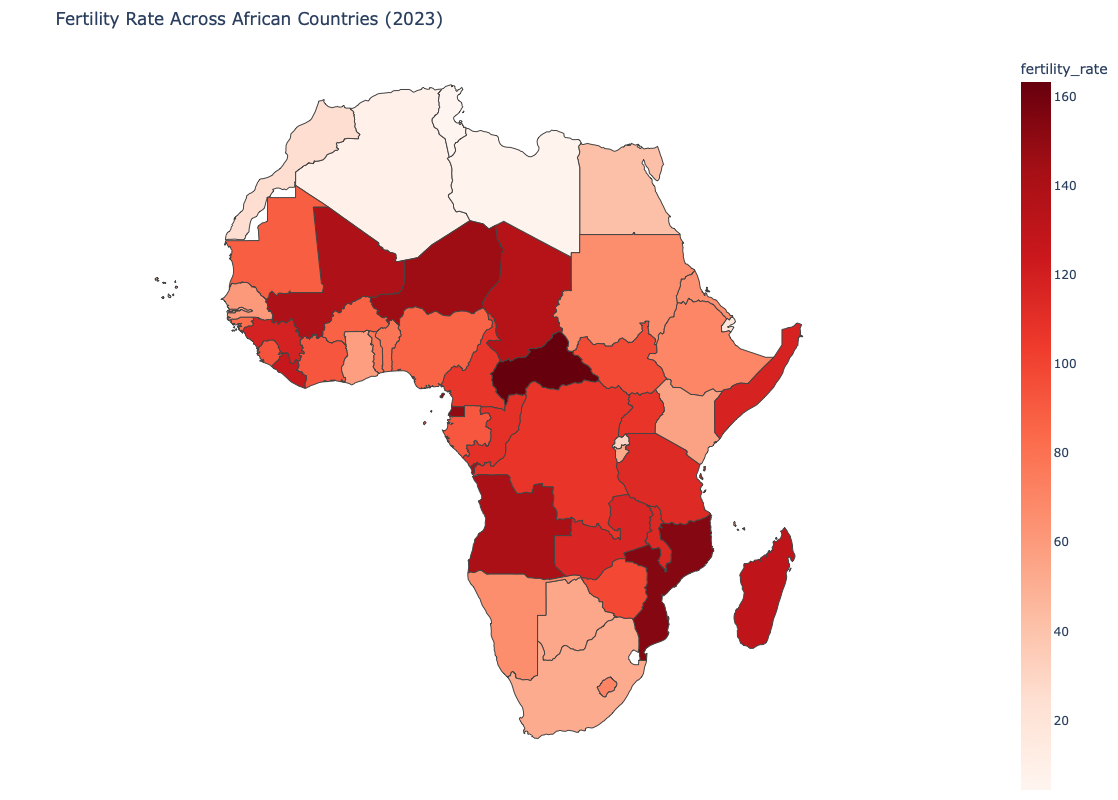

In [2307]:


# Plot the map using Plotly Express
fig = px.choropleth(
    merged_df_clean,
    locations="Country Name",
    locationmode="country names",
    color="fertility_rate",
    hover_name="Country Name",
    color_continuous_scale="Reds",
    title="Fertility Rate Across African Countries (2023)"
)

# Focus map on Africa
fig.update_geos(
    visible=False,
    resolution=50,
    scope="africa"
)

fig.update_layout(
    width=1000,   # Increase width
    height=800,   # Increase height
    margin={"r":0,"t":50,"l":0,"b":0}
)

fig.show()


# Data Limitations

Despite the insights uncovered, this analysis is constrained by several data limitations:

- Missing Data Across Countries
Several countries lack available data for important variables like **child labour**, which limited the breadth of the analysis. This reflects a broader issue in Africa: the **lack of reliable and publicly available data**, particularly for sensitive social indicators.

- Inconsistent Reference Years
While the analysis was based on the most recent publicly accessible data, **not all countries had records for the same year**. As a result, data from earlier years had to be used for some countries, potentially affecting **comparability and consistency** in the results.

- lack of Socio-Cultural and Policy Variables
The dataset does not include important contextual drivers such as **cultural norms**, **access to reproductive health services**, **family planning**, and **education programs** targeted at teenagers. These factors are **critical to fully understanding adolescent fertility patterns**, but remain unaccounted for in this dataset.
